<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 2*

# 📝 Assignment



# 1. Eigenstuff

주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하고, 각각 `value`, `vector`에 저장하세요.

\begin{bmatrix} 9 & 4 \\ 4 & 3 \end{bmatrix}

In [1]:
import pandas as pd
import numpy as np

matrix = np.array([[9,4],[4,3]])
matrix

array([[9, 4],
       [4, 3]])

In [2]:
value, vector = np.linalg.eig(matrix)
value, vector

(array([11.,  1.]), array([[ 0.89442719, -0.4472136 ],
        [ 0.4472136 ,  0.89442719]]))

# 2. PCA

Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot을 그리세요.

- 데이터셋 사용을 위해, 다음 링크를 참조하세요. <br>
  <http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` 입니다.

- 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

- 다음과 같은 결과가 나와야 합니다.

<img src='https://i.imgur.com/5BCEHeL.png'>

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('penguins')
species = df['species']
df = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Z = StandardScaler().fit_transform(df)
Z

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

In [5]:
pca = PCA(n_components = 2)
ext_df = pd.DataFrame(pca.fit_transform(Z), columns=['PC1','PC2'])
ext_df

,PC1,PC2
0,-1.843445,0.047702
1,-1.306762,-0.428348
2,-1.369181,-0.154476
3,-1.878827,-0.002048
4,-1.911748,0.829210
...,...,...
337,2.006436,-0.958909
338,1.840886,-0.767714
339,2.760742,0.288886
340,1.722364,-0.704269


In [6]:
ratio = pca.explained_variance_ratio_

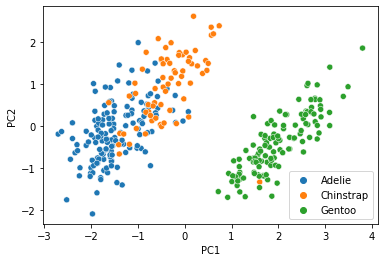

In [7]:
sns.scatterplot(x=ext_df['PC1'], y = ext_df['PC2'], hue = species)
plt.legend(loc='lower right');

# 🔥 도전과제 

위에서 PCA로 만든 데이터셋을 사용하여 "Scree Plot"을 만들어 보세요. 
90%의 내용을 설명하기 위해서, 몇 개의 PC를 사용해야 하나요?

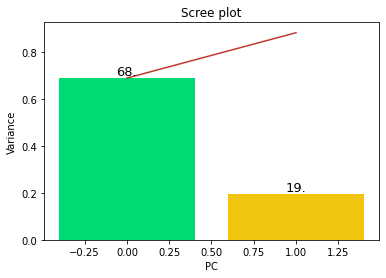

In [8]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

In [ ]:
# 90%의 내용을 설명하기 위해서는 적어도 2개의 PC는 사용해야 한다.